In [1]:
using Pkg
Pkg.activate("../../..")
using LaplaceRedux
import Random
import Random.seed!
using MLJ
using MLJBase

  Activating project at `c:\Users\marka\Documents\VSCode\Julia\LaplaceRedux.jl`


In [2]:
seed!(1234)
N = 300
X = MLJBase.table(rand(Float32, N, 4));
ycont = 2*X.x1 - X.x3 + 0.1*rand(N)
m, M = minimum(ycont), maximum(ycont)   
_, a, b, _ = range(m, stop=M, length=4) |> collect
y = map(ycont) do η
    if η < 0.9*a
        'a'
    elseif η < 1.1*b
        'b'
    else
        'c'
    end
end |> categorical;


In [3]:
la = LaplaceApproximation()
mach = machine(la, X, y)

┌ Warning: The number and/or types of data arguments do not match what the specified model
│ supports. Suppress this type check by specifying `scitype_check_level=0`.
│ 
│ Run `@doc unknown.LaplaceApproximation` to learn more about your model's requirements.
│ 
│ Commonly, but non exclusively, supervised models are constructed using the syntax
│ `machine(model, X, y)` or `machine(model, X, y, w)` while most other models are
│ constructed with `machine(model, X)`.  Here `X` are features, `y` a target, and `w`
│ sample or class weights.
│ 
│ In general, data in `machine(model, data...)` is expected to satisfy
│ 
│     scitype(data) <: MLJ.fit_data_scitype(model)
│ 
│ In the present case:
│ 
│ scitype(data) = Tuple{Table{AbstractVector{Continuous}}, AbstractVector{Multiclass{3}}}
│ 
│ fit_data_scitype(model) = Tuple{Union{Table{<:AbstractVector{<:Continuous}}, AbstractMatrix{Continuous}}, Union{AbstractArray{Finite}, AbstractArray{Continuous}}}
└ @ MLJBase C:\Users\marka\.julia\packages\M

untrained Machine; caches model-specific representations of data
  model: LaplaceApproximation(builder = MLP(hidden = (32, 32, 32), …), …)
  args: 
    1:	Source @833 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @881 ⏎ AbstractVector{Multiclass{3}}


In [4]:
MLJ.fit!(mach)

┌ Info: Training machine(LaplaceApproximation(builder = MLP(hidden = (32, 32, 32), …), …), …).
└ @ MLJBase C:\Users\marka\.julia\packages\MLJBase\5cxU0\src\machines.jl:492


Optimising neural net:  18%[====>                    ]  ETA: 0:00:59

Optimising neural net:  36%[=========>               ]  ETA: 0:00:24

Optimising neural net:  45%[===========>             ]  ETA: 0:00:17

Optimising neural net:  55%[=============>           ]  ETA: 0:00:12

Optimising neural net:  64%[===============>         ]  ETA: 0:00:08

Optimising neural net:  73%[==================>      ]  ETA: 0:00:06

Optimising neural net:  82%[====================>    ]  ETA: 0:00:03

Optimising neural net:  91%[======================>  ]  ETA: 0:00:02

Optimising neural net: 100%[=========================] Time: 0:00:15


trained Machine; caches model-specific representations of data
  model: LaplaceApproximation(builder = MLP(hidden = (32, 32, 32), …), …)
  args: 
    1:	Source @833 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @881 ⏎ AbstractVector{Multiclass{3}}


In [5]:
MLJ.predict(mach, MLJBase.table(rand(Float32, 1, 4)))

1-element UnivariateFiniteVector{Multiclass{3}, Char, UInt32, Float64}:
 UnivariateFinite{Multiclass{3}}(a=>0.214, b=>0.22, c=>0.565)

In [6]:
MLJ.predict(mach, X)

Float32[0.16532218 0.5798621 0.63177484 0.4112941 0.40779752 0.9721361 0.100497425 0.014908791 0.35365397 0.520355 0.40421855 0.6395616 0.783684 0.8396219 0.0544554 0.96714276 0.49813712 0.7897644 0.21305948 0.6960407 0.92789656 0.5667043 0.29480225 0.53636855 0.6290632 0.71138924 0.8086548 0.10392946 0.4557134 0.8067041 0.44200408 0.8705393 0.620847 0.9627145 0.35666078 0.15118009 0.41070247 0.7153546 0.081397116 0.9395476 0.6600315 0.52634364 0.47446138 0.0779683 0.9344228 0.96619666 0.6760474 0.66655785 0.72604805 0.33385903 0.19134623 0.80219877 0.6808968 0.15645838 0.8965994 0.38079917 0.70674825 0.068759084 0.28742296 0.86172485 0.47839445 0.0054365396 0.2824036 0.6984777 0.7457414 0.3492309 0.8774473 0.9109702 0.08562428 0.9736533 0.02506417 0.7606595 0.9761599 0.48891157 0.68558216 0.36264253 0.89337474 0.7087378 0.5904686 0.65669364 0.8052222 0.17386287 0.83088225 0.69736016 0.13796228 0.19172323 0.41668963 0.10051447 0.40078288 0.42138827 0.47888255 0.815926 0.22620398 0.9439

0.6790212 0.67921287 0.99918276 0.6330735 0.12638599 0.42068493 0.9652431 0.39466 0.5158184 0.6834782 0.48847628 0.37065548 0.5278367 0.7331045 0.9171366 0.9899075 0.7069514 0.52543133 0.7532028 0.7954533 0.573645 0.6875075 0.73187244 0.0620988 0.829076 0.17691034 0.89264643 0.634908 0.8064708 0.0059145093 0.011624992 0.4051922 0.24967635 0.58071333 0.13968664 0.3244185 0.18099761 0.5195296 0.81351215 0.98388934 0.99493456 0.89373535 0.7791602 0.15115261 0.58768785 0.9005262 0.38136297 0.62066364 0.42561948 0.7033263 0.6610964 0.29791862 0.19573694 0.8791518 0.8113243 0.38147092 0.5949651 0.36926 0.27099508 0.46136308 0.56687826 0.10286927 0.60790473 0.35085022 0.8503021 0.6123273 0.12484723 0.9730994 0.9936088 0.12189937 0.0686571 0.14308047 0.95336145 0.9660131 0.4843366 0.40982634 0.1509332 0.4872998 0.97158796 0.5892024 0.29429024 0.009276867 0.9311396 0.50117344 0.19190276 0.19214416 0.014360905 0.7173759 0.40672225 0.3662243 0.059574068 0.1351977 0.9439941 0.87856436 0.5650886 0.

 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.78240484 0.5944612 0.76466644 0.68021315 0.9188778 0.31678873 0.034482956 0.3069358 0.42860413 0.048154593 0.78899896 0.62130713 0.43354708 0.5867264 0.7381152 0.7258277 0.9522702 0.19700187 0.09981507 0.911713 0.60132647 0.5156738 0.44202578 0.0842492 0.5725609 0.88005245 0.13828695 0.50184184 0.73370177 0.09792763 0.5404197 0.64268816 0.47753608 0.8804024 0.6014333 0.20408583 0.5901009 0.053139746 0.020724356 0.1709863 0.3199988 0.8918018 0.7630807 0.15209883 0.33133662 0.7897672 0.45104736 0.18251759 0.13727355 0.2890247 0.03741485 0.6166784 0.49258822 0.49375296 0.8044411 0.019010723 0.09559542 0.53107214 0.18984771 0.87622726 0.6140703 0.2951482 0.11724764 0.50025785 0.07975471 0.8192987 0.9955324 0

0.926979 0.24424183 0.24488896 0.08267152 0.6447232 0.022868752 0.9659986 0.53367126 0.80599827 0.12144989 0.33919823 0.7826318 0.6816705 0.29082978 0.925237 0.6854628 0.60136086 0.55487835 0.6255127 0.9969929 0.7261784 0.09164637 0.99887043 0.33352673 0.80048615 0.28512615 0.53485245 0.562245 0.20341808 0.5119227 0.85432094 0.8857938 0.1985054 0.9488835 0.07243055 0.22691375 0.11893028 0.5288004 0.48075598 0.53244513 0.38528752 0.25105417 0.9209848 0.65378004 0.78226894 0.1539157 0.21147382 0.13832206 0.48857212 0.76138085 0.6703669 0.98252124 0.24574417 0.3892365 0.12515908 0.30145907 0.97289693 0.24778175 0.6565862 0.91007876 0.24744922 0.14263326 0.922798 0.7460805 0.8947133 0.48113585 0.2240889 0.35561353 0.029188633 0.34530753 0.7779738 0.30309427 0.06425768 0.6542303 0.86346716 0.35793614 0.716972 0.33141106 0.8571889 0.5183461 0.2925284 0.11769009 0.4533438 0.24295491 0.07458258 0.030334234 0.9760168 0.5461583 0.038529754 0.8346096 0.37299794 0.93734115 0.35436404 0.71781546 0.

0.7351872 0.1411112 0.8530345 0.71583146 0.048810184 0.56349164 0.46273184 0.24803418 0.44869 0.5996221 0.613598 0.24990308 0.023365796 0.56741786 0.39640182 0.39420426 0.3576733 0.64202476 0.25547802 0.9399812 0.41524667 0.4869336 0.23332375 0.42322236 0.39406008 0.7062664 0.068559885 0.23472989 0.22315925 0.06214565 0.8354003 0.7616364 0.9215533 0.83230525 0.6257219 0.25878638 0.19617587 0.39841336 0.60729957 0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.58729696 0.15124989 0.1253429 0.6979861 0.7126513 0.49596465 0.37370753 0.7255095 0.61277664 0.924031 0.16718775 0.27250314 0.087466836 0.53132784

 0.7838641 0.347134 0.25839442 0.8252056 0.011497796 0.26293403 0.008832872 0.08230829 0.91235524 0.68266034 0.24653858 0.6031214 0.46635896 0.88554174 0.19512612 0.6275166 0.7406092 0.8479886 0.33279884 0.50986385 0.1657545 0.7416847 0.014072657 0.8917918 0.70351905 0.26739478 0.8113189 0.8131166 0.22222304 0.057780683 0.86479205 0.6740237 0.49667072 0.89771754 0.34482372 0.1137166 0.7688486 0.3321699 0.7559677 0.22271216 0.86725116 0.89524585 0.9811011 0.7765731 0.7758096 0.70173347 0.3570534 0.85567236 0.7932191 0.4042179 0.54560727 0.86155874 0.3996886 0.50822675 0.8150668 0.93012935 0.76845205 0.49841642 0.44064963 0.04879129 0.2971002 0.22589535 0.8941778 0.26255137 0.5396348 0.46371162 0.7249643 0.64401764 0.20631129 0.7832641 0.87178236 0.6869495 0.06384426 0.9522333 0.24427849 0.78495896 0.21627665 0.95325917 0.8220774 0.5163317 0.5962744 0.3976577 0.93163764 0.74783784 0.96404237 0.5606587 0.7140614 0.6981178 0.6025068 0.72202224 0.622735 0.65768003 0.72299767 0.41825908 0.74

0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0.87652624 0.08491409 0.6315656 0.87414443 0.99445635 0.15549219 0.055096388 0.926222 0.56056756 0.28208643 0.9622682 0.29333377 0.99679255 0.56491137 0.90318996 0.23456907 0.8727655 0.11480343 0.011171341 0.72809035 0.8497278 0.77268106 0.8615579 0.59907556 0.8244253 0.65098923 0.8392629 0.24207413 0.64939725 0.44980943 0.69692206 0.872465 0.96501535 0.98121494 0.38602412 0.39566642 0.7439724 0.52806294 0.53298527 0.50486994 0.18927085 0.9375571 0.9151064 0.109520316 0.016509473 0.13003111 0.8259363 0.6841478 0.8585283 0.7257543 0.6473093 0.84692746 0.5503683 0.033445895 0.1869483 0.7505386 0.66026026 0.86365235; 0.6107248 0.98784965 0.9674504 0.9494775 0.12477416 0.92242616 0.3453219 0.56279653 0.6054233 0.94693106 0.6183338 0.41512316 0.7445648 0.76492906 0.095279396 0.30516624 0.77427125 0.24719232 0.083891094 0.1593324 0.47698337 0.28620046 0.015610278 0.2676897 0.9475911 0.38254565 0.289622 0.9050766 0.2053

 0.30220723 0.8828485 0.50813156 0.8019736 0.46795303 0.35554767 0.50834614 0.7254729 0.48243308 0.1177547 0.03420192 0.1359688 0.49275774 0.79504 0.76544684 0.3751437 0.9436278 0.53462446 0.7886759 0.45795912 0.67699 0.13657033 0.86318046 0.5716285 0.6191938 0.4286188 0.5811627 0.908035 0.47966665 0.06637716 0.17502457 0.65400696 0.2772696 0.18553287 0.33922237 0.95752203 0.476974 0.6881478 0.32148713 0.32019776 0.45256174 0.6335418 0.056147933 0.105350494 0.31825376 0.37146592 0.69421947 0.10684264 0.864158 0.40745795 0.5013075 0.03253901 0.96479255 0.072764456 0.95984066 0.7760314 0.40281177 0.1921972 0.24326253 0.3751074 0.40758014 0.52518827 0.22662365 0.054962993 0.8213404 0.8954591 0.8126681 0.6203324 0.2794175 0.83210033 0.98022985 0.39337838 0.7284996 0.7997312 0.22629154 0.9389881 0.27634686 0.043126285 0.76449025 0.37227744 0.3112849 0.90344244 0.40022868 0.37437856 0.79789984 0.7986313 0.81039554 0.6629884 0.5037545 0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.52

0.63305324 0.23532754 0.4879579 0.67279303 0.32935804 0.60393983 0.121877134 0.60026497 0.10097146 0.8045382 0.1534285 0.8085536 0.25420493 0.68663293 0.99158925 0.6872895 0.11120832 0.8613368]

300-element UnivariateFiniteVector{Multiclass{3}, Char, UInt32, Float64}:
 UnivariateFinite{Multiclass{3}}(a=>0.553, b=>0.23, c=>0.217)
 UnivariateFinite{Multiclass{3}}(a=>0.228, b=>0.497, c=>0.276)
 UnivariateFinite{Multiclass{3}}(a=>0.236, b=>0.353, c=>0.411)
 UnivariateFinite{Multiclass{3}}(a=>0.239, b=>0.541, c=>0.22)
 UnivariateFinite{Multiclass{3}}(a=>0.266, b=>0.507, c=>0.227)
 UnivariateFinite{Multiclass{3}}(a=>0.217, b=>0.229, c=>0.554)
 UnivariateFinite{Multiclass{3}}(a=>0.538, b=>0.242, c=>0.22)
 UnivariateFinite{Multiclass{3}}(a=>0.576, b=>0.212, c=>0.212)
 UnivariateFinite{Multiclass{3}}(a=>0.304, b=>0.466, c=>0.23)
 UnivariateFinite{Multiclass{3}}(a=>0.285, b=>0.484, c=>0.231)
 ⋮
 UnivariateFinite{Multiclass{3}}(a=>0.575, b=>0.213, c=>0.212)
 UnivariateFinite{Multiclass{3}}(a=>0.363, b=>0.401, c=>0.236)
 UnivariateFinite{Multiclass{3}}(a=>0.576, b=>0.212, c=>0.212)
 UnivariateFinite{Multiclass{3}}(a=>0.556, b=>0.228, c=>0.216)
 UnivariateFinite{Multiclass{3}}(a=>0.222, b=

┌ Info: Training machine(ProbabilisticTunedModel(model = LaplaceApproximation(builder = MLP(hidden = (32, 32, 32), …), …), …), …).
└ @ MLJBase C:\Users\marka\.julia\packages\MLJBase\5cxU0\src\machines.jl:492


Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344

┌ Info: Attempting to evaluate 25 models.
└ @ MLJTuning C:\Users\marka\.julia\packages\MLJTuning\ZFg3R\src\tuned_models.jl:727


 0.06778473 0.99641234 0.28537846 0.13131452 0.65318227 0.07421082 0.7414049 0.2059896 0.7351872 0.1411112 0.8530345 0.71583146 0.048810184 0.56349164 0.46273184 0.24803418 0.44869 0.5996221 0.613598 0.24990308 0.023365796 0.56741786 0.39640182 0.39420426 0.3576733 0.64202476 0.25547802 0.9399812 0.41524667 0.4869336 0.23332375 0.42322236 0.39406008 0.7062664 0.068559885 0.23472989 0.22315925 0.06214565 0.8354003 0.7616364 0.9215533 0.83230525 0.6257219 0.25878638 0.19617587 0.39841336 0.60729957 0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.282246

 0.64939725 0.44980943 0.69692206 0.872465 0.96501535 0.98121494 0.38602412 0.39566642 0.7439724 0.52806294 0.53298527 0.50486994 0.18927085 0.9375571 0.9151064 0.109520316 0.016509473 0.13003111 0.8259363 0.6841478 0.8585283 0.7257543 0.6473093 0.84692746 0.5503683 0.033445895 0.1869483 0.7505386 0.66026026 0.86365235; 0.7986313 0.81039554 0.6629884 0.5037545 0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.5203725 0.88078135 0.021224499 0.41436505 0.12798393 0.21896702 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973


Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.0

0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0.87652624 0.08491409 0.6315656 0.87414443 0.99445635 0.15549219 0.055096388 0.926222 0.56056756 0.28208643 0.9622682 0.29333377 0.99679255 0.56491137 0.90318996 0.23456907 0.8727655 0.11480343 0.011171341 0.72809035 0.8497278 0.77268106 0.8615579 0.59907556 

0.60026497 0.10097146 0.8045382 0.1534285 0.8085536 0.25420493 0.68663293 0.99158925 0.6872895 0.11120832 0.8613368]


Evaluating over 25 metamodels:   8%[==>                      ]  ETA: 0:37:04

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

0.3576733 0.64202476 0.25547802 0.9399812 0.41524667 0.4869336 0.23332375 0.42322236 0.39406008 0.7062664 0.068559885 0.23472989 0.22315925 0.06214565 0.8354003 0.7616364 0.9215533 0.83230525 0.6257219 0.25878638 0.19617587 0.39841336 0.60729957 0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0

0.8392629 0.24207413 0.64939725 0.44980943 0.69692206 0.872465 0.96501535 0.98121494 0.38602412 0.39566642 0.7439724 0.52806294 0.53298527 0.50486994 0.18927085 0.9375571 0.9151064 0.109520316 0.016509473 0.13003111 0.8259363 0.6841478 0.8585283 0.7257543 0.6473093 0.84692746 0.5503683 0.033445895 0.1869483 0.7505386 0.66026026 0.86365235; 0.7986313 0.81039554 0.6629884 0.5037545 0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.5203725 0.88078135 0.021224499 0.41436505 0.12798393 0.21896702 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 

Evaluating over 25 metamodels:  12%[===>                     ]  ETA: 0:35:12

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0.87652624 0.08491409 0.6315656 0.87414443 0.99445635 0.15549219 0.055096388 0.926222 0.56056756 0.28208643 0.9622682 0.29333377 0.99679255 0.56491137 0.90318996 0.23456907 0.8727655 0.11480343 0.011171341 0.72809035 0.8497278 0.77268106 0.8615579 0.59907556 0.8244253 0.65098923 0.8392629 0.24207413 0.64939725 0.44980943 0.69692206 0.872465 0.96501535 0.98121494 0.38602412 0.39566642 0.7439724 0.52806294 0.53298527 0.50486994 0.18927085 0.9375571 0.9151064 0.109

0.66026026 0.86365235; 0.7986313 0.81039554 0.6629884 0.5037545 0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.5203725 0.88078135 0.021224499 0.41436505 0.12798393 0.21896702 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 0.9150595 0.9575781 0.101486325 0.72846 0.76737523 0.18021297 0.06935227 0.63305324 0.23532754 0.4879579 0.67279303 0.32935804 0.60393983 0.121877134 0.60026497 0.10097146 0.8045382 0.1534285 0.8085536 0.25420493 0.68663293 0.99158925 0.6872895 0.11120832 0.8613368]


Evaluating over 25 metamodels:  16%[====>                    ]  ETA: 0:33:38

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0.87652624 0.08491409 0.6315656 0.87414443 0.99445635 0.15549219 0.055096388 0.926222 0.56056756 0.28208643 0.9622682 0.29333377 0.99679255 0.56491137 0.90318996 0.23456907 0.8727655 0.11480343 0.011171341 0.72809035 0.8497278

0.69692206 0.872465 0.96501535 0.98121494 0.38602412 0.39566642 0.7439724 0.52806294 0.53298527 0.50486994 0.18927085 0.9375571 0.9151064 0.109520316 0.016509473 0.13003111 0.8259363 0.6841478 0.8585283 0.7257543 0.6473093 0.84692746 0.5503683 0.033445895 0.1869483 0.7505386 0.66026026 0.86365235; 0.7986313 0.81039554 0.6629884 0.5037545 0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.5203725 0.88078135 0.021224499 0.41436505 0.12798393 0.21896702 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 

Evaluating over 25 metamodels:  20%[=====>                   ]  ETA: 0:31:58

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0.87652624 0.08491409 0.6315656 0.87414443 0.99445635 0.15549219 0.055096388 0.926222 0.56056756 0.28208643 0.9622682 0.29333377 0.99679255 0.56491137 0.90318996 0.23456907 0.8727655 0.11480343 0.011171341 0.72809035 0.8497278 0.77268106 0.8615579 0.59907556

 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 0.9150595 0.9575781 0.101486325 0.72846 0.76737523 0.18021297 0.06935227 0.63305324 0.23532754 0.4879579 0.67279303 0.32935804 0.60393983 0.121877134 0.60026497 0.10097146 0.8045382 0.1534285 0.8085536 0.25420493 0.68663293 0.99158925 0.6872895 0.11120832 0.8613368]


Evaluating over 25 metamodels:  24%[======>                  ]  ETA: 0:30:25

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

 0.24990308 0.023365796 0.56741786 0.39640182 0.39420426 0.3576733 0.64202476 0.25547802 0.9399812 0.41524667 0.4869336 0.23332375 0.42322236 0.39406008 0.7062664 0.068559885 0.23472989 0.22315925 0.06214565 0.8354003 0.7616364 0.9215533 0.83230525 0.6257219 0.25878638 0.19617587 0.39841336 0.60729957 0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.35689

 0.86365235; 0.7986313 0.81039554 0.6629884 0.5037545 0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.5203725 0.88078135 0.021224499 0.41436505 0.12798393 0.21896702 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 0.9150595 0.9575781 0.101486325 0.72846 0.76737523 0.18021297 0.06935227 0.63305324 0.23532754 0.4879579 0.67279303 0.32935804 0.60393983 0.121877134 0.60026497 0.10097146 0.8045382 0.1534285 0.8085536 0.25420493 0.68663293 0.99158925 0.6872895 0.11120832 0.8613368]


Evaluating over 25 metamodels:  28%[=======>                 ]  ETA: 0:28:50

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

0.048810184 0.56349164 0.46273184 0.24803418 0.44869 0.5996221 0.613598 0.24990308 0.023365796 0.56741786 0.39640182 0.39420426 0.3576733 0.64202476 0.25547802 0.9399812 0.41524667 0.4869336 0.23332375 0.42322236 0.39406008 0.7062664 0.068559885 0.23472989 0.22315925 0.06214565 0.8354003 0.7616364 0.9215533 0.83230525 0.6257219 0.25878638 0.19617587 0.39841336 0.60729957 0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173

 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 0.9150595 0.9575781 0.101486325 0.72846 0.76737523 0.18021297 0.06935227 0.63305324 0.23532754 0.4879579 0.67279303 0.32935804 0.60393983 0.121877134 0.60026497 0.10097146 0.8045382 0.1534285 0.8085536 0.25420493 0.68663293 0.99158925 0.6872895 0.11120832 0.8613368]


Evaluating over 25 metamodels:  32%[========>                ]  ETA: 0:27:13

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

0.25547802 0.9399812 0.41524667 0.4869336 0.23332375 0.42322236 0.39406008 0.7062664 0.068559885 0.23472989 0.22315925 0.06214565 0.8354003 0.7616364 0.9215533 0.83230525 0.6257219 0.25878638 0.19617587 0.39841336 0.60729957 0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0

 0.109520316 0.016509473 0.13003111 0.8259363 0.6841478 0.8585283 0.7257543 0.6473093 0.84692746 0.5503683 0.033445895 0.1869483 0.7505386 0.66026026 0.86365235; 0.7986313 0.81039554 0.6629884 0.5037545 0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.5203725 0.88078135 0.021224499 0.41436505 0.12798393 0.21896702 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 0.9150595 0.9575781 0.101486325 0.72846 0.76737523 0.18021297 0.06935227 0.63305324 0.23532754 0.4879579 0.67279303 0.32935804 0.60393983

Evaluating over 25 metamodels:  36%[=========>               ]  ETA: 0:25:38

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

0.048810184 0.56349164 0.46273184 0.24803418 0.44869 0.5996221 0.613598 0.24990308 0.023365796 0.56741786 0.39640182 0.39420426 0.3576733 0.64202476 0.25547802 0.9399812 0.41524667 0.4869336 0.23332375 0.42322236 0.39406008 0.7062664 0.068559885 0.23472989 0.22315925 0.06214565 0.8354003 0.7616364 0.9215533 0.83230525 0.6257219 0.25878638 0.19617587 0.39841336 0.60729957 0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173

0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.5203725 0.88078135 0.021224499 0.41436505 0.12798393 0.21896702 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 0.9150595 0.9575781 0.101486325 0.72846 0.76737523 0.18021297 0.06935227 0.63305324 0.23532754 0.4879579 0.67279303 0.32935804 0.60393983 0.121877134 0.60026497 0.10097146 0.8045382 0.1534285 0.8085536 0.25420493 0.68663293 0.99158925 0.6872895 0.11120832 0.8613368]

Evaluating over 25 metamodels:  40%[==========>              ]  ETA: 0:24:07

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

 0.39420426 0.3576733 0.64202476 0.25547802 0.9399812 0.41524667 0.4869336 0.23332375 0.42322236 0.39406008 0.7062664 0.068559885 0.23472989 0.22315925 0.06214565 0.8354003 0.7616364 0.9215533 0.83230525 0.6257219 0.25878638 0.19617587 0.39841336 0.60729957 0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498

 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0.87652624 0.08491409 0.6315656 0.87414443 0.99445635 0.15549219 0.055096388 0.926222 0.56056756 0.28208643 0.9622682 0.29333377 0.99679255 0.56491137 0.90318996 0.23456907 0.8727655 0.11480343 0.011171341 0.72809035 0.8497278 0.77268106 0.8615579 0.59907556 0.8244253 0.65098923 0.8392629 0.24207413 0.64939725 0.44980943 0.69692206 0.872465 0.96501535 0.98121494 0.38602412 0.39566642 0.7439724 0.52806294 0.53298527 0.50486994 0.18927085 0.9375571 0.9151064 0.109520316 0.016509473 0.13003111 0.8259363 0.6841478 0.8585283 0.7257543 0.6473093 0.84692746 0.5503683 0.033445895 0.1869483 0.7505386 0.66026026 0.86365235; 0.7986313 0.81039554 0.6629884 0.5037545 0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.5203725 0.88078135 0.021224499 0.41436505 0.12798393 0.21896702 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 

0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 0.9150595 0.9575781 0.101486325 0.72846 0.76737523 0.18021297 0.06935227 0.63305324 0.23532754 0.4879579 0.67279303 0.32935804 0.60393983 0.121877134 0.60026497 0.10097146 0.8045382 0.1534285 0.8085536 0.25420493 0.68663293 0.99158925 0.6872895 0.11120832 0.8613368]


Evaluating over 25 metamodels:  44%[===========>             ]  ETA: 0:22:29

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

0.22315925 0.06214565 0.8354003 0.7616364 0.9215533 0.83230525 0.6257219 0.25878638 0.19617587 0.39841336 0.60729957 0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0.87652624 0.08491409 0.6315656 0.87414443 0.99445635 0.15549219 0.055096388 0.926222 0.56056756 0.28208643 0

0.72767025 0.9150595 0.9575781 0.101486325 0.72846 0.76737523 0.18021297 0.06935227 0.63305324 0.23532754 0.4879579 0.67279303 0.32935804 0.60393983 0.121877134 0.60026497 0.10097146 0.8045382 0.1534285 0.8085536 0.25420493 0.68663293 0.99158925 0.6872895 0.11120832 0.8613368]


Evaluating over 25 metamodels:  48%[============>            ]  ETA: 0:20:53

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

 0.5996221 0.613598 0.24990308 0.023365796 0.56741786 0.39640182 0.39420426 0.3576733 0.64202476 0.25547802 0.9399812 0.41524667 0.4869336 0.23332375 0.42322236 0.39406008 0.7062664 0.068559885 0.23472989 0.22315925 0.06214565 0.8354003 0.7616364 0.9215533 0.83230525 0.6257219 0.25878638 0.19617587 0.39841336 0.60729957 0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.7000717

0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 0.9150595 0.9575781 0.101486325 0.72846 0.76737523 0.18021297 0.06935227 0.63305324 0.23532754 0.4879579 0.67279303 0.32935804 0.60393983 0.121877134 0.60026497 0.10097146 0.8045382 0.1534285 0.8085536 0.25420493 0.68663293 0.99158925 0.6872895 0.11120832 0.8613368]


Evaluating over 25 metamodels:  52%[=============>           ]  ETA: 0:19:22

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

 0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0.87652624 0.08491409 0.6315656 0.87414443 0.99445635 0.15549219 0.055096388 0.926222 0.56056756 0.28208643 0.9622682 0.29333377 0.99679255 0.56491137 0.90318996 0.23456907 0.8727655 0.11480343 0.011171341 0.72809035 0.849727

 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 0.9150595 0.9575781 0.101486325 0.72846 0.76737523 0.18021297 0.06935227 0.63305324 0.23532754 0.4879579 0.67279303 0.32935804 0.60393983 0.121877134 0.60026497 0.10097146 0.8045382 0.1534285 0.8085536 0.25420493 0.68663293 0.99158925 0.6872895 0.11120832 0.8613368]


Evaluating over 25 metamodels:  56%[==============>          ]  ETA: 0:17:48

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

 0.7616364 0.9215533 0.83230525 0.6257219 0.25878638 0.19617587 0.39841336 0.60729957 0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0.87652624 0.08491409 0.6315656 0.87414443 0.99445635 0.15549219 0.055096388 0.926222 0.56056756 0.28208643 0.9622682 0.29333377 0.99679255 

 0.8615579 0.59907556 0.8244253 0.65098923 0.8392629 0.24207413 0.64939725 0.44980943 0.69692206 0.872465 0.96501535 0.98121494 0.38602412 0.39566642 0.7439724 0.52806294 0.53298527 0.50486994 0.18927085 0.9375571 0.9151064 0.109520316 0.016509473 0.13003111 0.8259363 0.6841478 0.8585283 0.7257543 0.6473093 0.84692746 0.5503683 0.033445895 0.1869483 0.7505386 0.66026026 0.86365235; 0.7986313 0.81039554 0.6629884 0.5037545 0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.5203725 0.88078135 0.021224499 0.41436505 0.12798393 0.21896702 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0

Evaluating over 25 metamodels:  60%[===============>         ]  ETA: 0:16:07

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

0.25878638 0.19617587 0.39841336 0.60729957 0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0.87652624 0.08491409 0.6315656 0.87414443 0.99445635 0.15549219 0.055096388 0.926222 0.56056756 0.28208643 0.9622682 0.29333377 0.99679255 0.56491137 0.90318996 0.23456907 0.8727655

0.53298527 0.50486994 0.18927085 0.9375571 0.9151064 0.109520316 0.016509473 0.13003111 0.8259363 0.6841478 0.8585283 0.7257543 0.6473093 0.84692746 0.5503683 0.033445895 0.1869483 0.7505386 0.66026026 0.86365235; 0.7986313 0.81039554 0.6629884 0.5037545 0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.5203725 0.88078135 0.021224499 0.41436505 0.12798393 0.21896702 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 0.9150595 0.9575781 0.101486325 0.72846 0.76737523 0.18021297 0.06935227 0.63305324 0

Evaluating over 25 metamodels:  64%[================>        ]  ETA: 0:14:29

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

0.023365796 0.56741786 0.39640182 0.39420426 0.3576733 0.64202476 0.25547802 0.9399812 0.41524667 0.4869336 0.23332375 0.42322236 0.39406008 0.7062664 0.068559885 0.23472989 0.22315925 0.06214565 0.8354003 0.7616364 0.9215533 0.83230525 0.6257219 0.25878638 0.19617587 0.39841336 0.60729957 0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 

0.872465 0.96501535 0.98121494 0.38602412 0.39566642 0.7439724 0.52806294 0.53298527 0.50486994 0.18927085 0.9375571 0.9151064 0.109520316 0.016509473 0.13003111 0.8259363 0.6841478 0.8585283 0.7257543 0.6473093 0.84692746 0.5503683 0.033445895 0.1869483 0.7505386 0.66026026 0.86365235; 0.7986313 0.81039554 0.6629884 0.5037545 0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.5203725 0.88078135 0.021224499 0.41436505 0.12798393 0.21896702 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 0.9150595 0

0.4879579 0.67279303 0.32935804 0.60393983 0.121877134 0.60026497 0.10097146 0.8045382 0.1534285 0.8085536 0.25420493 0.68663293 0.99158925 0.6872895 0.11120832 0.8613368]

Evaluating over 25 metamodels:  68%[=================>       ]  ETA: 0:12:51

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

 0.613598 0.24990308 0.023365796 0.56741786 0.39640182 0.39420426 0.3576733 0.64202476 0.25547802 0.9399812 0.41524667 0.4869336 0.23332375 0.42322236 0.39406008 0.7062664 0.068559885 0.23472989 0.22315925 0.06214565 0.8354003 0.7616364 0.9215533 0.83230525 0.6257219 0.25878638 0.19617587 0.39841336 0.60729957 0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.886089

0.99445635 0.15549219 0.055096388 0.926222 0.56056756 0.28208643 0.9622682 0.29333377 0.99679255 0.56491137 0.90318996 0.23456907 0.8727655 0.11480343 0.011171341 0.72809035 0.8497278 0.77268106 0.8615579 0.59907556 0.8244253 0.65098923 0.8392629 0.24207413 0.64939725 0.44980943 0.69692206 0.872465 0.96501535 0.98121494 0.38602412 0.39566642 0.7439724 0.52806294 0.53298527 0.50486994 0.18927085 0.9375571 0.9151064 0.109520316 0.016509473 0.13003111 0.8259363 0.6841478 0.8585283 0.7257543 0.6473093 0.84692746 0.5503683 0.033445895 0.1869483 0.7505386 0.66026026 0.86365235; 0.7986313 0.81039554 0.6629884 0.5037545 0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.5203725 0.88078135 0.021224499 0.41436505 0.12798393 0.21896702 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.

 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 0.9150595 0.9575781 0.101486325 0.72846 0.76737523 0.18021297 0.06935227 0.63305324 0.23532754 0.4879579 0.67279303 0.32935804 0.60393983 0.121877134 0.60026497 0.10097146 0.8045382 0.1534285 0.8085536 0.25420493 0.68663293 0.99158925 0.6872895 0.11120832 0.8613368]


Evaluating over 25 metamodels:  72%[==================>      ]  ETA: 0:11:14

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0.87652624 0.08491409 0.6315656 0.87414443 0.99445635 0.15549219 0.055096388 0.926222 0.56056756 0.28208643 0.9622682 0.29333377 0.99679255 0.56491137 0.90318996 0.23456907 0.8727655 0.11480343 0.011171341 0.72809035 0.8497278 0.77268106 0.8615579 0.59907556

0.69692206 0.872465 0.96501535 0.98121494 0.38602412 0.39566642 0.7439724 0.52806294 0.53298527 0.50486994 0.18927085 0.9375571 0.9151064 0.109520316 0.016509473 0.13003111 0.8259363 0.6841478 0.8585283 0.7257543 0.6473093 0.84692746 0.5503683 0.033445895 0.1869483 0.7505386 0.66026026 0.86365235; 0.7986313 0.81039554 0.6629884 0.5037545 0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.5203725 0.88078135 0.021224499 0.41436505 0.12798393 0.21896702 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 

Evaluating over 25 metamodels:  76%[===================>     ]  ETA: 0:09:38

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0.87652624 0.08491409 0.6315656 0.87414443 0.99445635 0.15549219 0.055096388 0.926222 0.56056756 0.28208643 0.9622682 0.29333377 0.99679255 0.56491137 0.90318996 0.23456907 0.8727655 0.11480343 0.011171341 0.72809035 0.8497278 0.77268106 0.8615579 0.59907556 0.8244253 0.65098923 0.8392629 0.24207413 0.64939725 0.44980943 0.69692206 0.872465 0.96501535 0.98121494 0.38602412 0.39566642 0.7439724 0.52806294 0.53298527 0.50486994 0.18927085 0.9375571 0.9151064 0.109520316 0.016509473 0.13003111 0.8259363 0.6841478 0.8585283 0.7257543 0.6473093 0.84692746 0.550

Evaluating over 25 metamodels:  80%[====================>    ]  ETA: 0:08:03

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0.87652624 0.08491409 0.6315656 0.87414443 0.99445635 0.15549219 0.055096388 0.926222 0.56056756 0.28208643 0.9622682 0.29333377 0.99679255 0.56491137 0.90318996 0.23456907 0.8727655 0.11480343 0.011171341 0.72809035 0.8497278 0.77268106 0.8615579 0

0.39566642 0.7439724 0.52806294 0.53298527 0.50486994 0.18927085 0.9375571 0.9151064 0.109520316 0.016509473 0.13003111 0.8259363 0.6841478 0.8585283 0.7257543 0.6473093 0.84692746 0.5503683 0.033445895 0.1869483 0.7505386 0.66026026 0.86365235; 0.7986313 0.81039554 0.6629884 0.5037545 0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.5203725 0.88078135 0.021224499 0.41436505 0.12798393 0.21896702 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 0.9150595 0.9575781 0.101486325 0.72846 0.76737523 0.

Evaluating over 25 metamodels:  84%[=====================>   ]  ETA: 0:06:27

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

0.60729957 0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0.87652624 0.08491409 0.6315656 0.87414443 0.99445635 0.15549219 0.055096388 0.926222 0.56056756 0.28208643 0.9622682 0.29333377 0.99679255 0.56491137 0.90318996 0.23456907 0.8727655 0.11480343 0.011171341 0.7280903

 0.7439724 0.52806294 0.53298527 0.50486994 0.18927085 0.9375571 0.9151064 0.109520316 0.016509473 0.13003111 0.8259363 0.6841478 0.8585283 0.7257543 0.6473093 0.84692746 0.5503683 0.033445895 0.1869483 0.7505386 0.66026026 0.86365235; 0.7986313 0.81039554 0.6629884 0.5037545 0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.5203725 0.88078135 0.021224499 0.41436505 0.12798393 0.21896702 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 0.9150595 0.9575781 0.101486325 0.72846 0.76737523 0.18021297 0

Evaluating over 25 metamodels:  88%[======================>  ]  ETA: 0:04:52

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

 0.7062664 0.068559885 0.23472989 0.22315925 0.06214565 0.8354003 0.7616364 0.9215533 0.83230525 0.6257219 0.25878638 0.19617587 0.39841336 0.60729957 0.21763575 0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0.87652624 0.08491409 0.6315656 0.87414443 0.99445635 0.15549219 0.05509638

0.9375571 0.9151064 0.109520316 0.016509473 0.13003111 0.8259363 0.6841478 0.8585283 0.7257543 0.6473093 0.84692746 0.5503683 0.033445895 0.1869483 0.7505386 0.66026026 0.86365235; 0.7986313 0.81039554 0.6629884 0.5037545 0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.5203725 0.88078135 0.021224499 0.41436505 0.12798393 0.21896702 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 0.9150595 0.9575781 0.101486325 0.72846 0.76737523 0.18021297 0.06935227 0.63305324 0.23532754 0.4879579 0.67279303 0.

Evaluating over 25 metamodels:  92%[=======================> ]  ETA: 0:03:16

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

0.031149328 0.4608671 0.5947434 0.15653765 0.13319016 0.17685956 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0.87652624 0.08491409 0.6315656 0.87414443 0.99445635 0.15549219 0.055096388 0.926222 0.56056756 0.28208643 0.9622682 0.29333377 0.99679255 0.56491137 0.90318996 0.23456907 0.8727655 0.11480343 0.011171341 0.72809035 0.8497278 0.77268106

0.81039554 0.6629884 0.5037545 0.47074896 0.55309564 0.8744821 0.42120016 0.70547235 0.5203725 0.88078135 0.021224499 0.41436505 0.12798393 0.21896702 0.08459729 0.028029561 0.69600195 0.10500324 0.81870687 0.46599132 0.67142004 0.70187575 0.75548494 0.41842127 0.54987067 0.33860922 0.31056142 0.615312 0.04902792 0.5196635 0.74812853 0.15958303 0.9872092 0.81845355 0.6167413 0.8241443 0.9511548 0.46696597 0.57601935 0.4085273 0.75447637 0.02060914 0.84478873 0.18645781 0.86248845 0.8767659 0.6703764 0.48150122 0.8845159 0.07807851 0.6612452 0.65068895 0.00012391806 0.38021773 0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 0.9150595 0.9575781 0.101486325 0.72846 0.76737523 0.18021297 0.06935227 0.63305324 0.23532754 0.4879579 0.67279303 0.32935804 0.60393983 0.121877134 0.60026497 0.10097146 0.8045382 0.1534285 0.8085536 0.25420493 0.68663293 0.99158925 0.6872895 0.11120832 0.8613368]

Evaluating over 25 metamodels:  96%[========================>]  ETA: 0:01:39

Float32[0.87856436 0.5650886 0.008935869 0.6632633 0.93031573 0.9718015 0.82688934 0.14255315 0.41705966 0.8366324 0.5876904 0.020092964 0.27035362 0.30277765 0.9208812 0.9074377 0.20098424 0.24460196 0.9991578 0.16400963 0.7862503 0.21823102 0.8991626 0.03671515 0.4071775 0.37859386 0.47274703 0.68415344 0.22328556 0.7498574 0.8834188 0.9678656 0.3968429 0.4834112 0.8669824 0.26573616 0.57787067 0.2973174 0.38930905 0.61340404 0.11029923 0.74368423 0.5375536 0.3633721 0.67052495 0.9241581 0.75625014 0.55724716 0.9754534 0.11680651 0.99093693 0.80999446 0.7710067 0.6682192 0.101358294 0.44299918 0.23325235 0.06643689 0.9198963 0.99097186 0.07650107 0.57911646 0.002673149 0.7384242 0.3316977 0.42385745 0.9784208 0.8903199 0.24702352 0.75235057 0.6753092 0.7227549 0.8064789 0.15120327 0.76108 0.49001884 0.80990213 0.7081839 0.33293796 0.1993131 0.7974036 0.09855342 0.33351284 0.13155365 0.14627618 0.22886461 0.76447374 0.89335316 0.9888065 0.95089495; 0.8457431 0.95483774 0.75411344 0.06

 0.55116224 0.18988574 0.92794925 0.49171978 0.88724107 0.1822477 0.066115856 0.59436244 0.49732125 0.7043399 0.59529346 0.09161842 0.14803469 0.37090206 0.07286382 0.87836635 0.97937596 0.74100286 0.3932346 0.22082269 0.55101484 0.28328526 0.7434276 0.1547485 0.79905766 0.7471935 0.01735282 0.68908715 0.35211122 0.19414377 0.102077305 0.03226441 0.016291142; 0.8377536 0.83444756 0.17700642 0.9823552 0.94666296 0.28224695 0.07930452 0.50280905 0.12959856 0.4220931 0.23751438 0.7153392 0.521955 0.7790886 0.54815984 0.01734525 0.6753709 0.32431173 0.10644525 0.5401802 0.19036585 0.7131693 0.70007175 0.8860899 0.3568948 0.582498 0.23244917 0.21097916 0.14533311 0.60333675 0.3550272 0.93424916 0.87652624 0.08491409 0.6315656 0.87414443 0.99445635 0.15549219 0.055096388 0.926222 0.56056756 0.28208643 0.9622682 0.29333377 0.99679255 0.56491137 0.90318996 0.23456907 0.8727655 0.11480343 0.011171341 0.72809035 0.8497278 0.77268106 0.8615579 0.59907556 0.8244253 0.65098923 0.8392629 0.24207413 

0.76865065 0.2691008 0.68666756 0.61322564 0.20586246 0.36481434 0.7284117 0.30123973 0.87636167 0.72767025 0.9150595 0.9575781 0.101486325 0.72846 0.76737523 0.18021297 0.06935227 0.63305324 0.23532754 0.4879579 0.67279303 0.32935804 0.60393983 0.121877134 0.60026497 0.10097146 0.8045382 0.1534285 0.8085536 0.25420493 0.68663293 0.99158925 0.6872895 0.11120832 0.8613368]

Evaluating over 25 metamodels: 100%[=========================] Time: 0:41:37


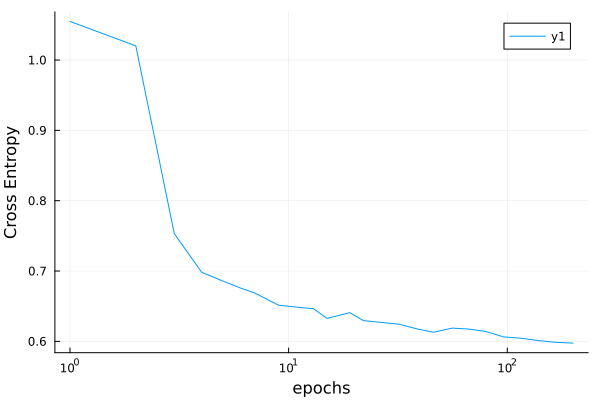

In [7]:
r = range(la, :epochs; lower=1, upper=200, scale=:log10)
curve = learning_curve(
    la, X, y; range=r, resampling=Holdout(; fraction_train=0.7), measure=cross_entropy
)
using Plots
plot(
    curve.parameter_values,
    curve.measurements;
    xlab=curve.parameter_name,
    xscale=curve.parameter_scale,
    ylab="Cross Entropy",
)
